# Figures for Italy presentation

## Collapse study

### Setup

In [2]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from doe import GP

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=20
axis_font = 18
subt_font = 18
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
pd.options.mode.chained_assignment = None  

# <change these to your paths> 
path_to_loss_file = '../../data/loss/structural_db_complete_distributions.pickle'
path_to_max_file = '../../data/loss/structural_db_complete_max_loss.pickle'

# also change this to point to the directory with the brace database
# (should be ../data/, I think)
path_to_braceShapes = '../../resource/'

### Collapse definitions

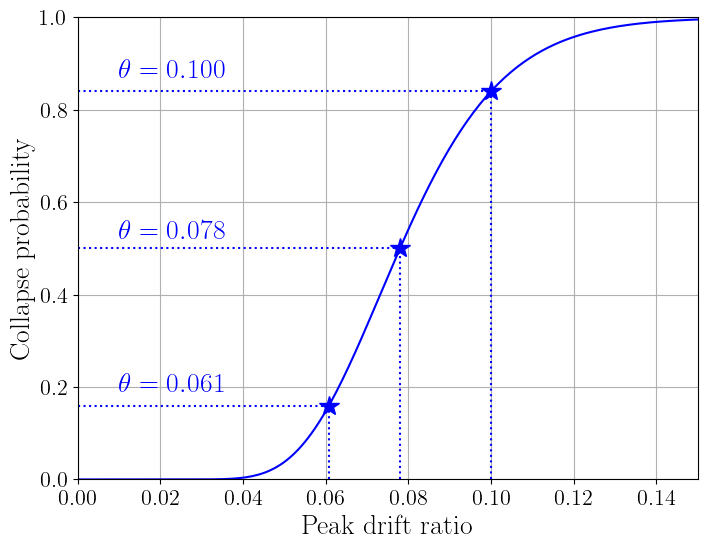

In [ ]:

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

# collapse as a probability
from scipy.stats import lognorm
from math import log, exp

collapse_drift_def_mu_std = 0.1


from scipy.stats import norm
inv_norm = norm.ppf(0.84)
beta_drift = 0.25
mean_log_drift = exp(log(collapse_drift_def_mu_std) - beta_drift*inv_norm) # 0.9945 is inverse normCDF of 0.84
# mean_log_drift = 0.05
ln_dist = lognorm(s=beta_drift, scale=mean_log_drift)

label_size = 16
clabel_size = 12
x = np.linspace(0, 0.15, 200)

mu = log(mean_log_drift)

ln_dist = lognorm(s=beta_drift, scale=mean_log_drift)
p = ln_dist.cdf(np.array(x))


fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(x, p, label='Collapse (peak)', color='blue')

mu_irr = log(0.01)
ln_dist_irr = lognorm(s=0.3, scale=exp(mu_irr))
p_irr = ln_dist_irr.cdf(np.array(x))

# ax.plot(x, p_irr, color='red', label='Irreparable (residual)')

axis_font = 20
subt_font = 18
xright = 0.0
xleft = 0.15
ax.set_ylim([0,1])
ax.set_xlim([0, xleft])
ax.set_ylabel('Collapse probability', fontsize=axis_font)
ax.set_xlabel('Peak drift ratio', fontsize=axis_font)

ax.vlines(x=exp(mu), ymin=0, ymax=0.5, color='blue', linestyle=":")
ax.hlines(y=0.5, xmin=xright, xmax=exp(mu), color='blue', linestyle=":")
ax.text(0.01, 0.52, r'$\theta = %.3f$'% mean_log_drift , fontsize=axis_font, color='blue')
ax.plot([exp(mu)], [0.5], marker='*', markersize=15, color="blue", linestyle=":")

upper = ln_dist.ppf(0.84)
ax.vlines(x=upper, ymin=0, ymax=0.84, color='blue', linestyle=":")
ax.hlines(y=0.84, xmin=xright, xmax=upper, color='blue', linestyle=":")
ax.text(0.01, 0.87, r'$\theta = %.3f$' % upper, fontsize=axis_font, color='blue')
ax.plot([upper], [0.84], marker='*', markersize=15, color="blue", linestyle=":")

lower= ln_dist.ppf(0.16)
ax.vlines(x=lower, ymin=0, ymax=0.16, color='blue', linestyle=":")
ax.hlines(y=0.16, xmin=xright, xmax=lower, color='blue', linestyle=":")
ax.text(0.01, 0.19, r'$\theta = %.3f$' % lower, fontsize=axis_font, color='blue')
ax.plot([lower], [0.16], marker='*', markersize=15, color="blue", linestyle=":")


# ax.set_title('Replacement fragility definition', fontsize=axis_font)
ax.grid()



### Load collapse only data

In [ ]:
import time

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 20
subt_font = 20
import matplotlib as mpl
label_size = 18
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
clabel_size = 16

main_obj_doe = pd.read_pickle('../../data/tfp_mf_db_doe_prestrat.pickle')
df_doe = main_obj_doe.doe_analysis


# from ast import literal_eval
# df_doe = pd.read_csv('../../data/doe/temp_save.csv', 
#                      converters={'PID': literal_eval,
#                                  'PFV': literal_eval,
#                                  'PFA': literal_eval,
#                                  'RID': literal_eval,
#                                  'beam': literal_eval,
#                                  'column': literal_eval})

collapse_drift_def_mu_std = 0.1

from experiment import collapse_fragility
df_doe[['max_drift',
   'collapse_prob']] = df_doe.apply(
       lambda row: collapse_fragility(row, mf_drift_mu_plus_std=collapse_drift_def_mu_std), 
       axis='columns', result_type='expand')



# df_doe = df_doe.drop(columns=['index'])

df_doe['max_drift'] = df_doe.PID.apply(max)
df_doe['log_drift'] = np.log(df_doe['max_drift'])

df_doe['max_velo'] = df_doe.PFV.apply(max)
df_doe['max_accel'] = df_doe.PFA.apply(max)

df_doe['T_ratio'] = df_doe['T_m'] / df_doe['T_fb']
df_doe['T_ratio_e'] = df_doe['T_m'] / df_doe['T_fbe']
pi = 3.14159
g = 386.4

zetaRef = [0.02, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
BmRef   = [0.8, 1.0, 1.2, 1.5, 1.7, 1.9, 2.0]
df_doe['Bm'] = np.interp(df_doe['zeta_e'], zetaRef, BmRef)

df_doe['gap_ratio'] = (df_doe['constructed_moat']*4*pi**2)/ \
    (g*(df_doe['sa_tm']/df_doe['Bm'])*df_doe['T_m']**2)

    
print('% impact of DoE set:', sum(df_doe['impacted'])/df_doe.shape[0])
print('average drift:', df_doe['max_drift'].mean())

df_init = df_doe.head(50)

from loads import define_gravity_loads
config_dict = {
    'S_1' : 1.017,
    'k_ratio' : 10,
    'Q': 0.06,
    'num_frames' : 2,
    'num_bays' : 4,
    'num_stories' : 4,
    'L_bay': 30.0,
    'h_story': 13.0,
    'isolator_system' : 'TFP',
    'superstructure_system' : 'MF',
    'S_s' : 2.2815
}
(W_seis, W_super, w_on_frame, P_on_leaning_column,
       all_w_cases, all_plc_cases) = define_gravity_loads(config_dict)

% impact of DoE set: 0.31238095238095237
average drift: 0.01882744300948127


### GP (collapse, DoE)

In [ ]:
mdl_doe = GP(df_doe)
covariate_list = ['gap_ratio', 'RI', 'T_ratio', 'zeta_e']
mdl_doe.set_covariates(covariate_list)
mdl_doe.set_outcome('collapse_prob')

kernel_name = 'rbf_iso'
mdl_doe.fit_gpr(kernel_name=kernel_name)

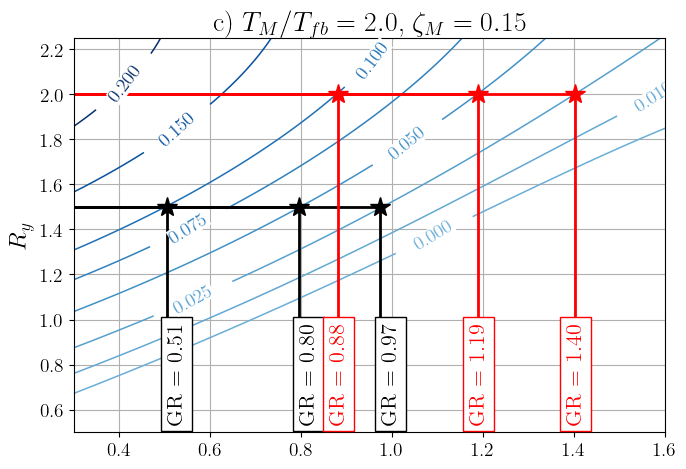

In [13]:
plt.close('all')

from inverse import make_2D_plotting_space

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=20
axis_font = 18
subt_font = 16
label_size = 14
clabel_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

res = 75
plt_density = 200
x_var = 'gap_ratio'
y_var = 'RI'
X_plot = make_2D_plotting_space(mdl_doe.X, res, x_var=x_var, y_var=y_var, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            x_bounds = [0.3, 2.0], y_bounds = [0.5, 2.25],
                            third_var_set = 2.0, fourth_var_set = 0.1)
xx = X_plot[x_var]
yy = X_plot[y_var]
x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

fmu_highlight = mdl_doe.gpr.predict(X_plot, return_std=False)

Z_highlight = fmu_highlight.reshape(xx_pl.shape)

fig = plt.figure(figsize=(13, 13))


##########################################################################

X_plot = make_2D_plotting_space(mdl_doe.X, res, x_var=x_var, y_var=y_var, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            x_bounds = [0.3, 2.0], y_bounds = [0.5, 2.25],
                            third_var_set = 2.0, fourth_var_set = 0.15)
xx = X_plot[x_var]
yy = X_plot[y_var]
x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

fmu_highlight = mdl_doe.gpr.predict(X_plot, return_std=False)

Z_highlight = fmu_highlight.reshape(xx_pl.shape)

ax=fig.add_subplot(3, 2, 3)

# Plot the surface.
cmap = plt.cm.Blues
cs = ax.contour(xx_pl, yy_pl, Z_highlight, levels=lvls,  linewidths=1.1, cmap=cmap,
                vmin=-0.2, vmax=0.2)
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]

# draw lines for design targets

prob_list = [0.025, 0.05, 0.1]
from scipy.interpolate import RegularGridInterpolator
for j, prob_des in enumerate(prob_list):
    xq = np.linspace(0.3, 2.0, 200)
    
    Ry_target = 1.5
    
    interp = RegularGridInterpolator((y_pl, x_pl), Z_highlight)
    pts = np.zeros((200,2))
    pts[:,1] = xq
    pts[:,0] = Ry_target
    
    lq = interp(pts)
    
    the_points = np.vstack((pts[:,0], pts[:,1], lq))
    
    theGapIdx = np.argmin(abs(lq - prob_des))
    
    theGap = xq[theGapIdx]
    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='black',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='black', linewidth=2.0)
    ax.text(theGap, 0.55, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='black')
    
    
    # Ry = 2.0
    Ry_target = 2.0
    pts[:,0] = Ry_target
    lq = interp(pts)
    
    the_points = np.vstack((pts[:,0], pts[:,1], lq))
    
    theGapIdx = np.argmin(abs(lq - prob_des))
    
    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='red',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='red', linewidth=2.0)
    ax.text(theGap-0.02, 0.55, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='red', bbox=dict(facecolor='white', edgecolor='red'))
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='red')
    

    

# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_title(r'c) $T_M/T_{fb} = 2.0$, $\zeta_M = 0.15$', fontsize=title_font)
ax.set_xlim([0.3, 1.6])
ax.set_ylim([0.5, 2.25])
ax.grid()

##########################################################################

    
fig.tight_layout(w_pad=0.2)